In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [175]:
data = pd.read_csv("CarPrice_Assignment.csv")

In [176]:
df=data.copy()

In [177]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60000,...,130,mpfi,3.47000,2.68000,9.00000,111,5000,21,27,13495.00000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60000,...,130,mpfi,3.47000,2.68000,9.00000,111,5000,21,27,16500.00000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50000,...,152,mpfi,2.68000,3.47000,9.00000,154,5000,19,26,16500.00000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80000,...,109,mpfi,3.19000,3.40000,10.00000,102,5500,24,30,13950.00000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40000,...,136,mpfi,3.19000,3.40000,8.00000,115,5500,18,22,17450.00000


In [178]:
df.tail(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.10000,...,141,mpfi,3.78000,3.15000,9.50000,114,5400,23,28,16845.00000
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.10000,...,141,mpfi,3.78000,3.15000,8.70000,160,5300,19,25,19045.00000
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.10000,...,173,mpfi,3.58000,2.87000,8.80000,134,5500,18,23,21485.00000
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.10000,...,145,idi,3.01000,3.40000,23.00000,106,4800,26,27,22470.00000
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.10000,...,141,mpfi,3.78000,3.15000,9.50000,114,5400,19,25,22625.00000


In [179]:
df.shape

(205, 26)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [181]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [182]:
print(df.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [183]:
# model ve marka birleşik geliyor onu ayıralım.
char_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index
for c in char_cols:
    print(df[c].unique())

['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel isuzu 

In [184]:
#kategorik olması gerekirken numerik gelmiş onu çevirelim.
df["symboling"]=df["symboling"].astype("object")

In [185]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)

In [186]:
df.drop(['CarName'],axis=1,inplace=True)

In [187]:
df.drop(['car_ID'],axis=1,inplace=True)

In [188]:
df.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.60000,168.80000,...,130,mpfi,3.47000,2.68000,9.00000,111,5000,21,27,13495.00000
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.60000,168.80000,...,130,mpfi,3.47000,2.68000,9.00000,111,5000,21,27,16500.00000
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.50000,171.20000,...,152,mpfi,2.68000,3.47000,9.00000,154,5000,19,26,16500.00000
3,2,audi,gas,std,four,sedan,fwd,front,99.80000,176.60000,...,109,mpfi,3.19000,3.40000,10.00000,102,5500,24,30,13950.00000
4,2,audi,gas,std,four,sedan,4wd,front,99.40000,176.60000,...,136,mpfi,3.19000,3.40000,8.00000,115,5500,18,22,17450.00000


In [189]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [190]:
df = df.replace(to_replace ="maxda", value ="mazda") 
df = df.replace(to_replace ="porcshce", value ="porsche") 
df = df.replace(to_replace ="toyouta", value ="toyota") 
df = df.replace(to_replace ="vokswagen", value ="volkswagen") 
df = df.replace(to_replace ="vw", value ="volkswagen")
df = df.replace(to_replace ="Nissan", value ="nissan")

In [191]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [192]:
df.loc[df.duplicated()]

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [193]:
#Şimdi eksik değerlere bakalım.
df.isnull().sum()

symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

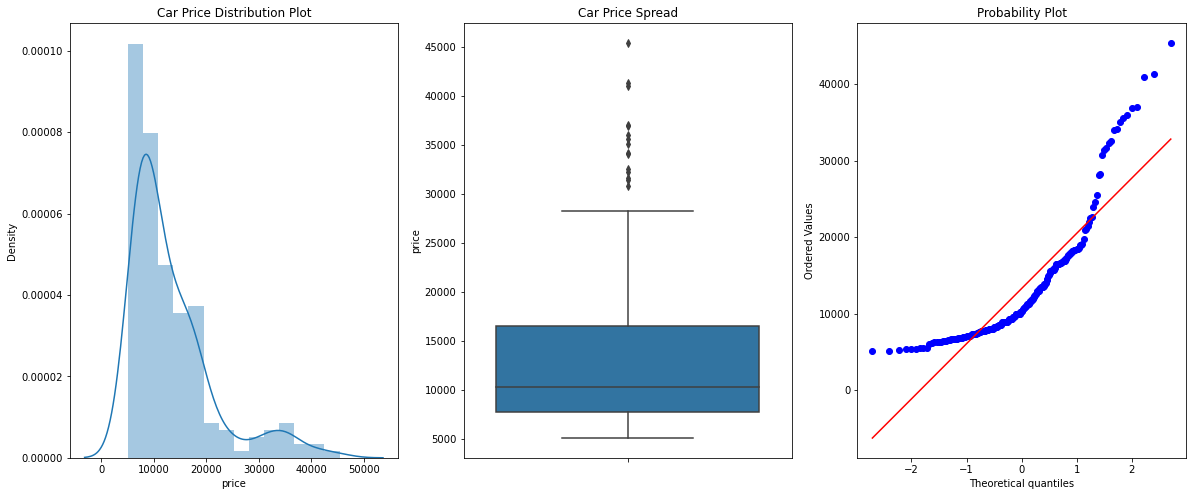

In [194]:
#bağımlı değişkenimiz hedef featuremizin dağılımına bakalım. Normal olarak dağılmıyor. Aykırı değerleri var.
from scipy import stats
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,3,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.subplot(1,3,3)
stats.probplot(df['price'], plot = plt)

plt.show()

In [195]:
df["price"].describe()

count     205.00000
mean    13276.71057
std      7988.85233
min      5118.00000
25%      7788.00000
50%     10295.00000
75%     16503.00000
max     45400.00000
Name: price, dtype: float64

In [196]:
#price float gelmiş aşağıda bazı algoritmalarda hata aldığım için integera çevirdim.
df['price'] = df['price'].astype('int')

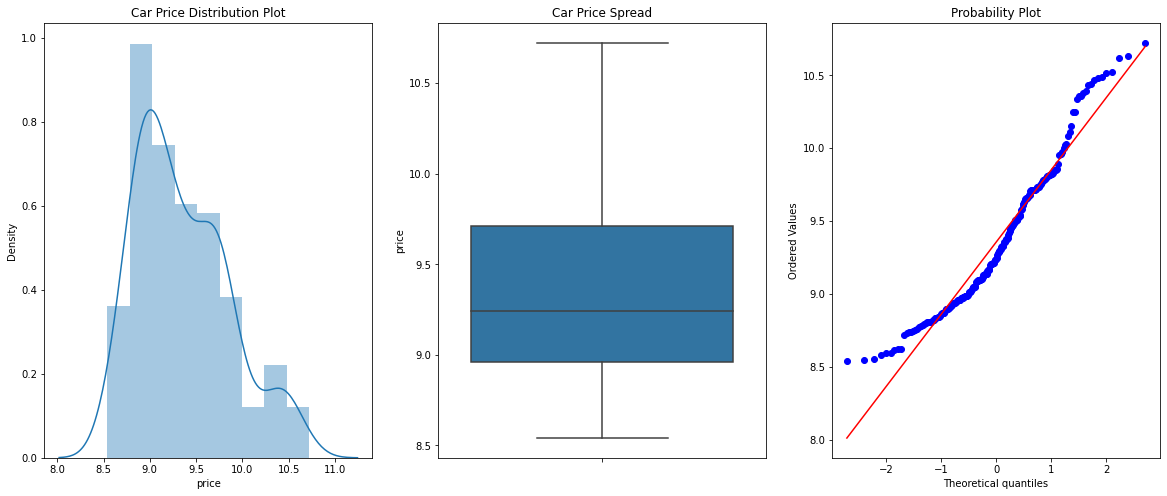

In [197]:
#Hedef değişkenimin logaritmasını alıyorum aykırı değerlerden kurtuluyorum.
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.title('Car Price Distribution Plot')
sns.distplot(np.log(df["price"]))

plt.subplot(1,3,2)
plt.title('Car Price Spread')
sns.boxplot(y=np.log(df.price))

plt.subplot(1,3,3)
stats.probplot(np.log(df.price), plot = plt)

plt.show()

In [198]:
#logaritmasını aldıktan sonra ki normal dağılımı test edelim. Normal olmadığını görüyoruz.
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["price"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(np.log(df[ozellik]))
    norm_stats = normaltest(np.log(df[ozellik]))
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,price,15.71439,0.00039,14.10345,0.00087


In [199]:
#df["price"]=np.log(df["price"])

In [200]:
#boxcox dönüşümü deneyerek normalleştirmeye çalışacağım. Bunda da normalleşmiyor.
from scipy import stats
xt, _ = stats.boxcox(df["price"])
k2, p = stats.normaltest(df["price"])
print("p = {:g}".format(p))

k2, p = stats.jarque_bera(df["price"])
print("p = {:g}".format(p))


p = 1.57833e-17
p = 0


Nümerik featurelar ile hedef değişkenimiz olan price ile ilişkilerine bakalım.

In [201]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

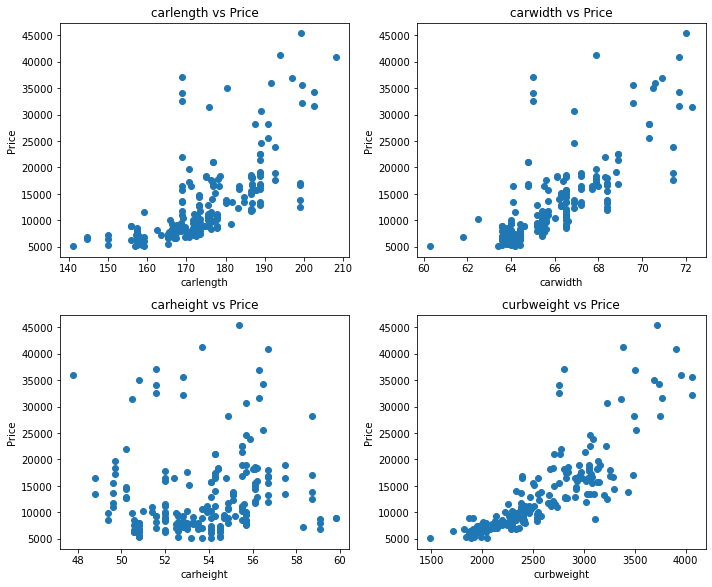

In [202]:
plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

yukarıda carheight değişkeni için anlamlı bir ilişki yok gözüküyor.

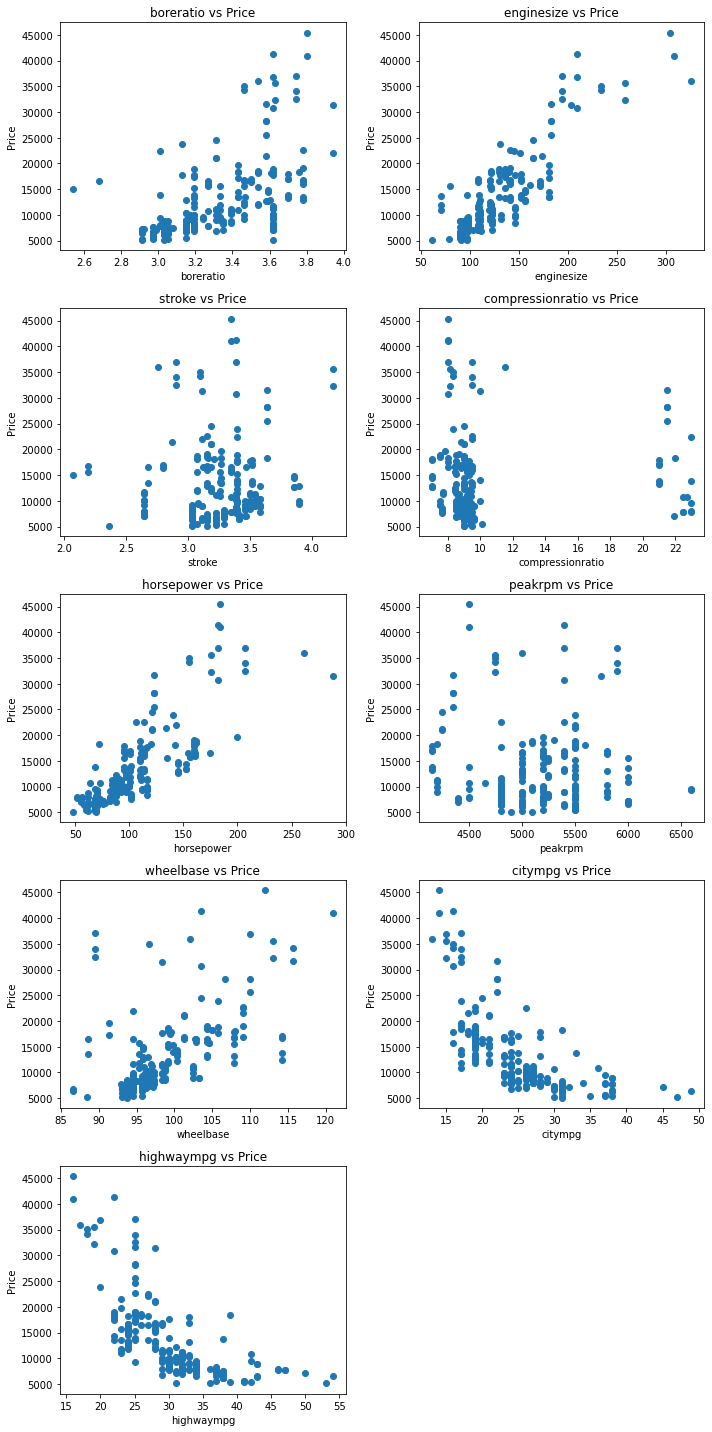

In [203]:
def pp(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

plt.figure(figsize=(10,20))

scatter('boreratio', 1)
scatter('enginesize', 2)
scatter('stroke', 3)
scatter('compressionratio', 4)

scatter('horsepower', 5)
scatter('peakrpm', 6)
scatter('wheelbase', 7)
scatter('citympg', 8)
scatter('highwaympg', 9)

plt.tight_layout()


<AxesSubplot:title={'center':'Pearson Correlation of Variables'}>

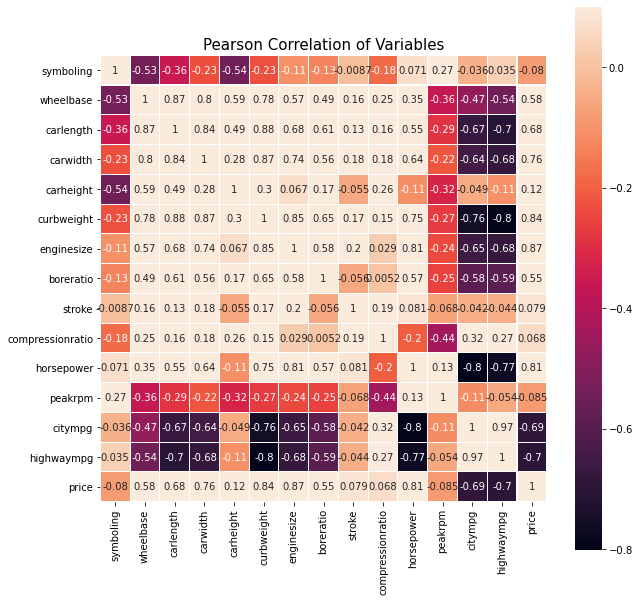

In [204]:
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Variables',y=1, size=15)
sns.heatmap(df.corr(),lw=0.1,vmax=0.1,square=True,linecolor='white',annot=True)

In [205]:
#birbirleriyle güçlü korelasyona sahip olanlar var. 
#highwaympg ve citympg
np.corrcoef(df['highwaympg'], df['citympg'])[0, 1]

0.9713370423425061

In [206]:
#bunu yeni bir feature olarak ekleyelim.
df['fueleconomy'] = (0.55 * df['citympg']) + (0.45 * df['highwaympg'])

In [207]:
np.corrcoef(df['carlength'], df['carwidth'])[0, 1]

0.841118268481846

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CompanyName       205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

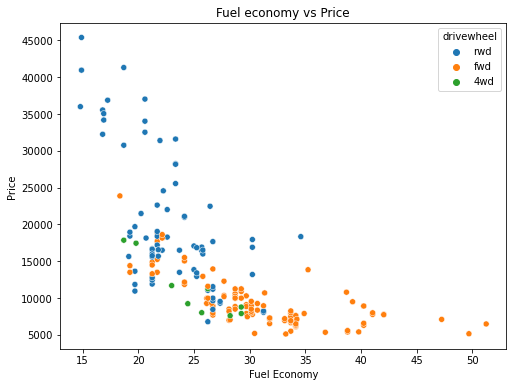

<Figure size 432x288 with 0 Axes>

In [209]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=df['fueleconomy'],y=df['price'],hue=df['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

Kategorik değişkenlerle bağımlı değişkenimize bakalım.

Text(0.5, 1.0, 'Markalara göre ortalama satış fiyatları')

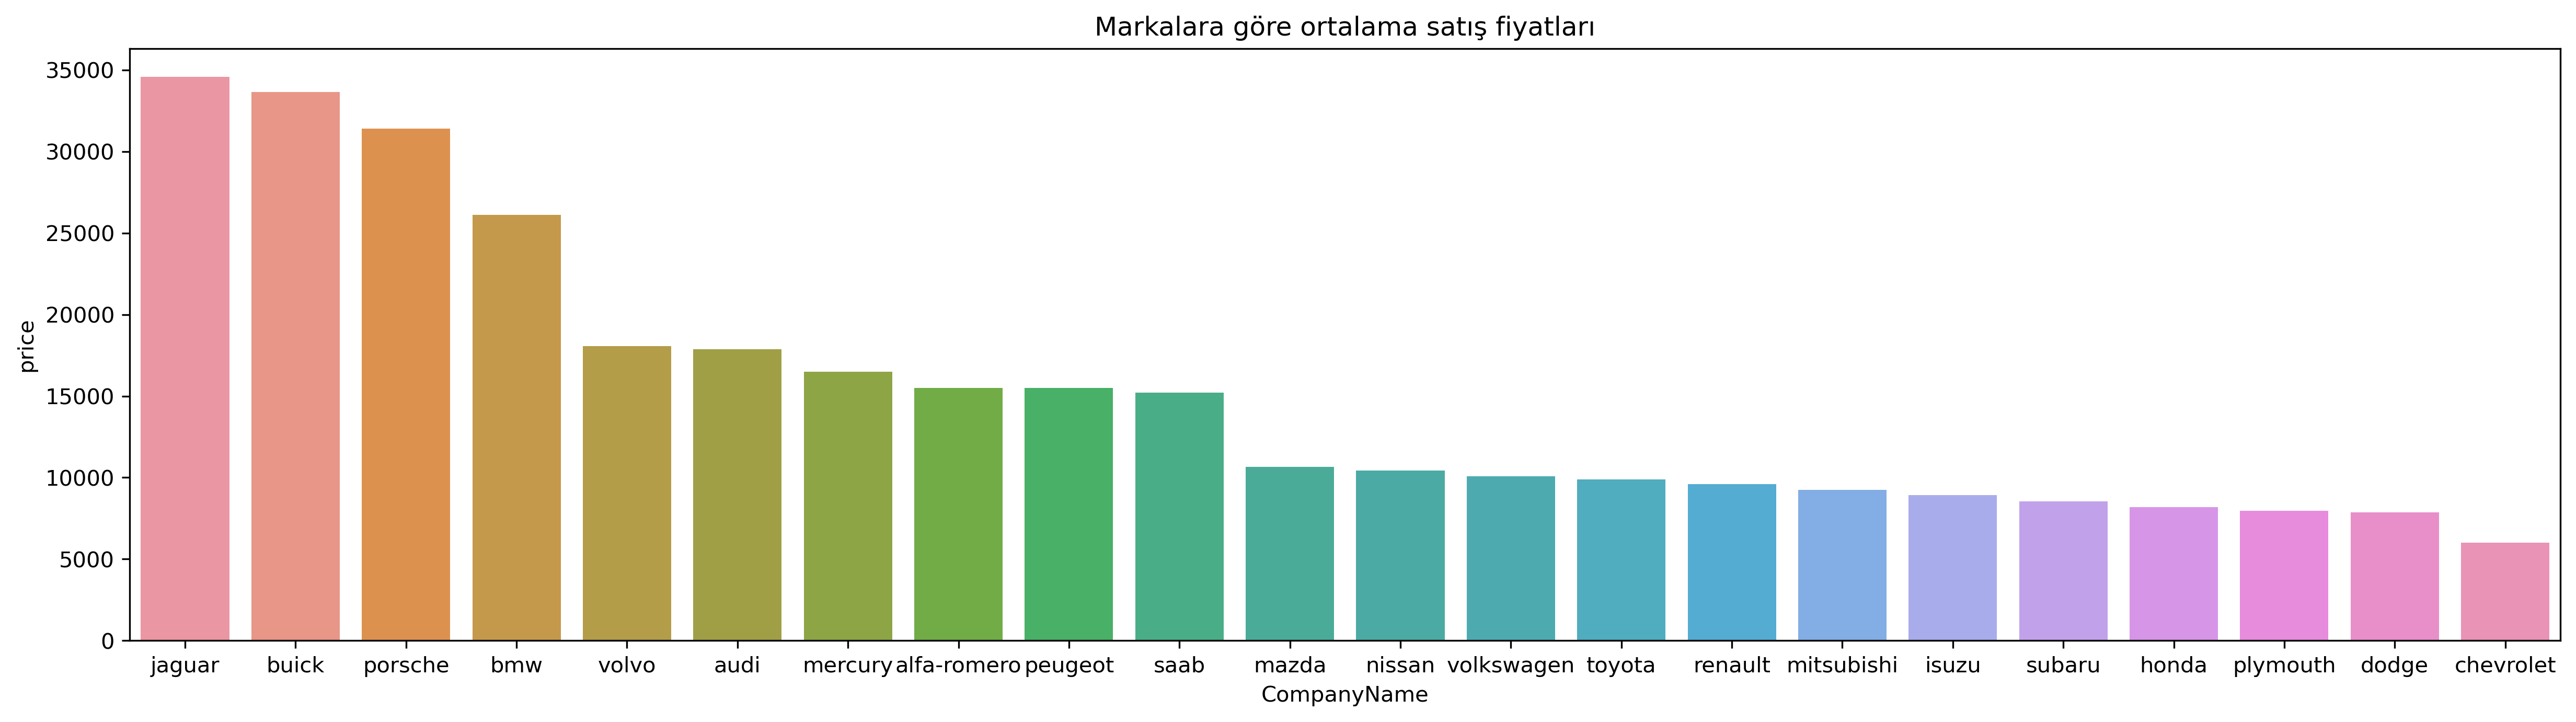

In [210]:
df_grup = df.groupby(by=['CompanyName'])['price'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(20,5),dpi=300)
sns.barplot(x="CompanyName", y="price", data= df_grup)
plt.title("Markalara göre ortalama satış fiyatları")

Text(0.5, 1.0, 'Markalara göre toplam satış fiyatları')

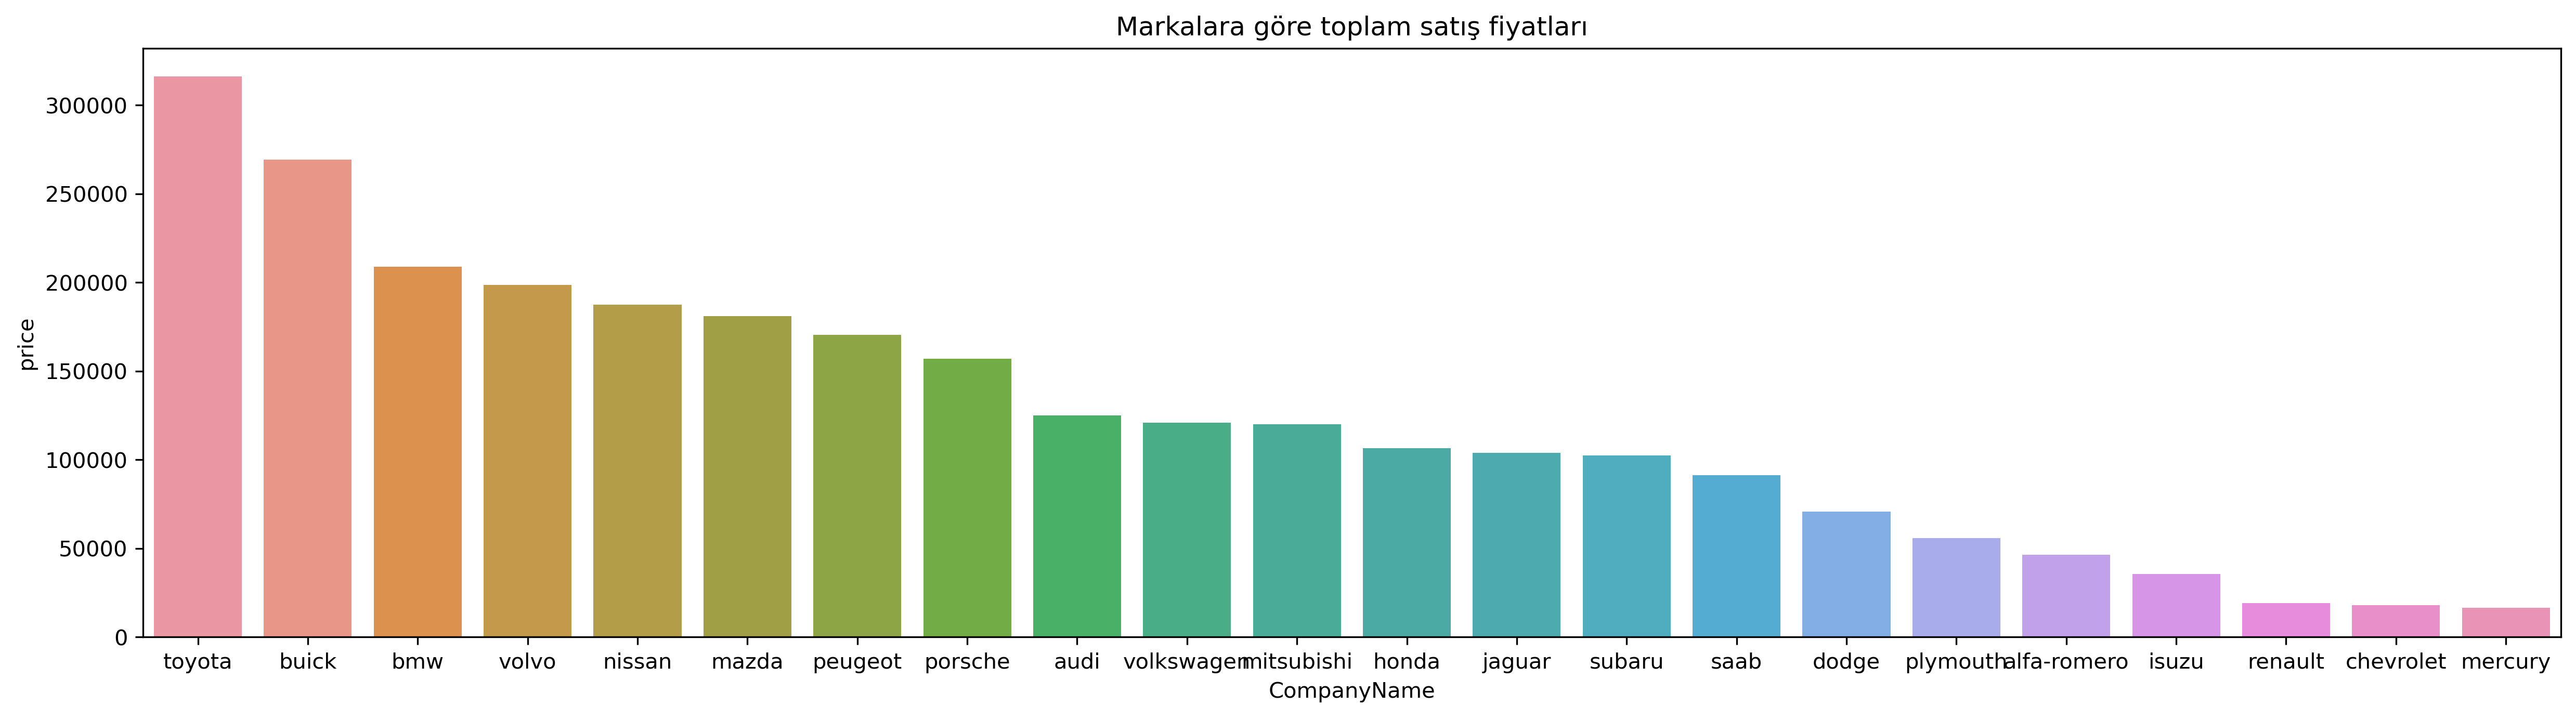

In [211]:
df_grup = df.groupby(by=['CompanyName'])['price'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(20,5),dpi=300)
sns.barplot(x="CompanyName", y="price", data= df_grup)
plt.title("Markalara göre toplam satış fiyatları")

Text(0.5, 1.0, 'Fueltype')

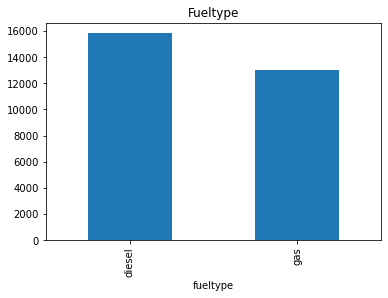

In [212]:
df_grup=df.groupby(by=['fueltype'])['price'].mean()
df_grup.sort_values(ascending =False).plot(kind="bar")
plt.title("Fueltype")

Text(0.5, 1.0, 'carbody')

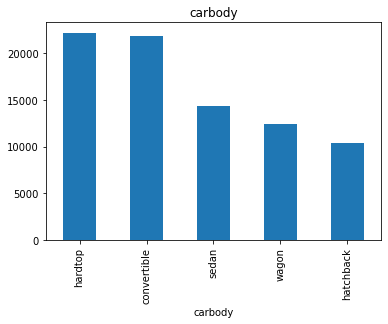

In [213]:
df_grup=df.groupby(by=['carbody'])['price'].mean()
df_grup.sort_values(ascending =False).plot(kind="bar")
plt.title("carbody")

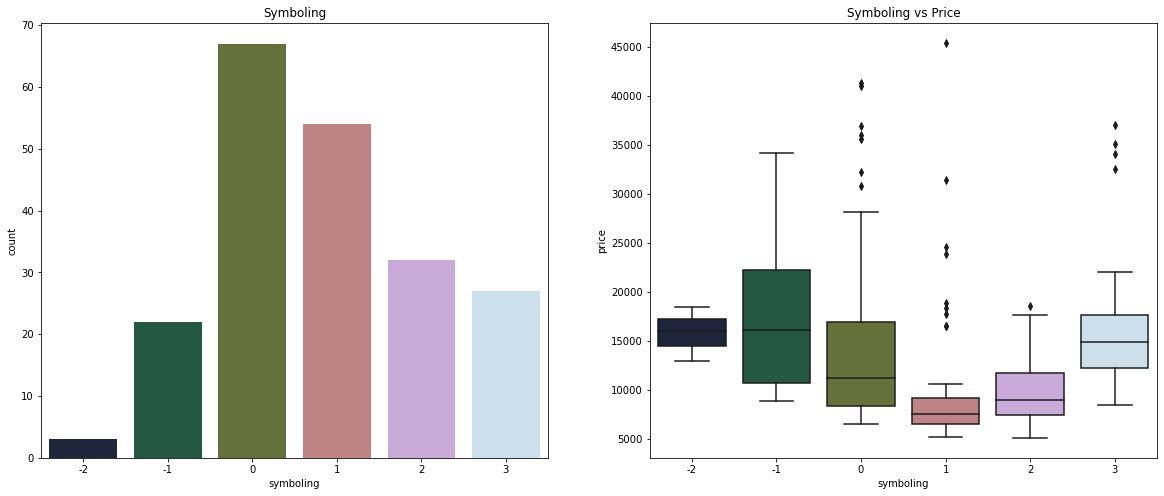

In [214]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling')
sns.countplot(df.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df.symboling, y=df.price, palette=("cubehelix"))

plt.show()

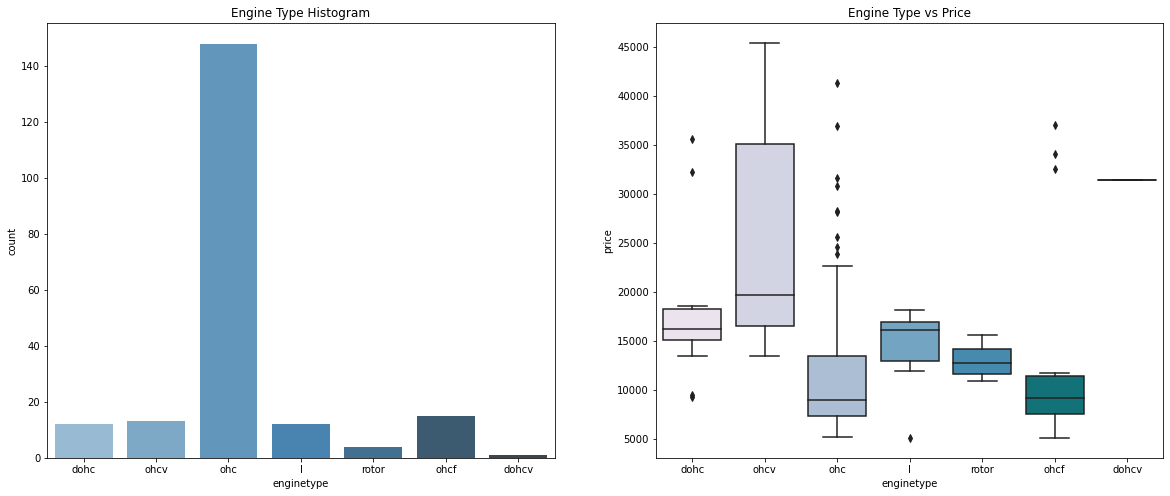

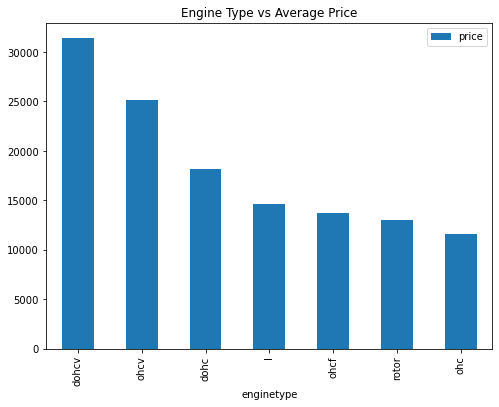

In [215]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(df.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=df.enginetype, y=df.price, palette=("PuBuGn"))

plt.show()

df_grup= pd.DataFrame(df.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df_grup.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

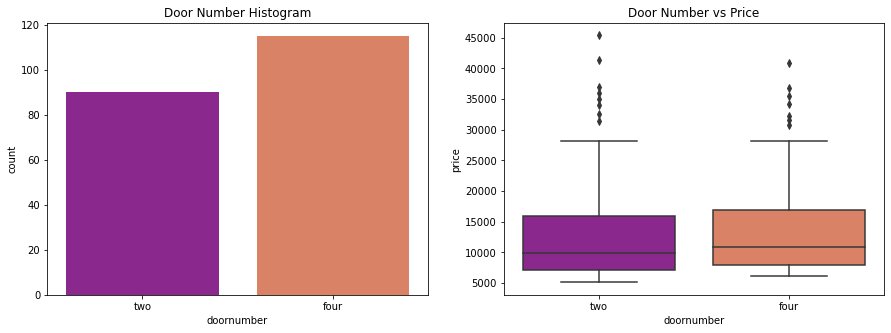

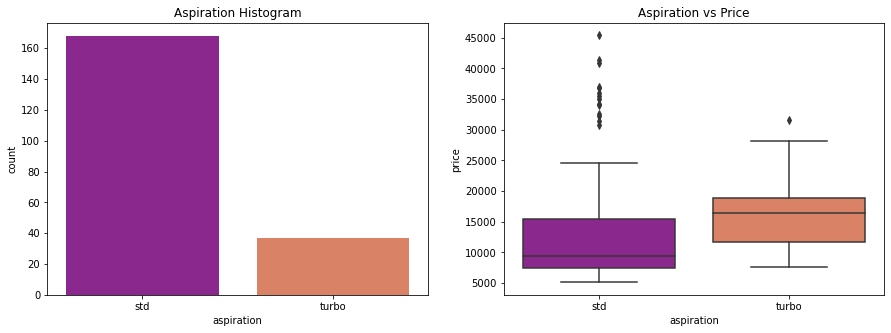

In [216]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(df.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=df.doornumber, y=df.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(df.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=df.aspiration, y=df.price, palette=("plasma"))

plt.show()

door number feature ile çok fiyatı etkilemiyor. Bunu verisetimden çıkarabilirim.

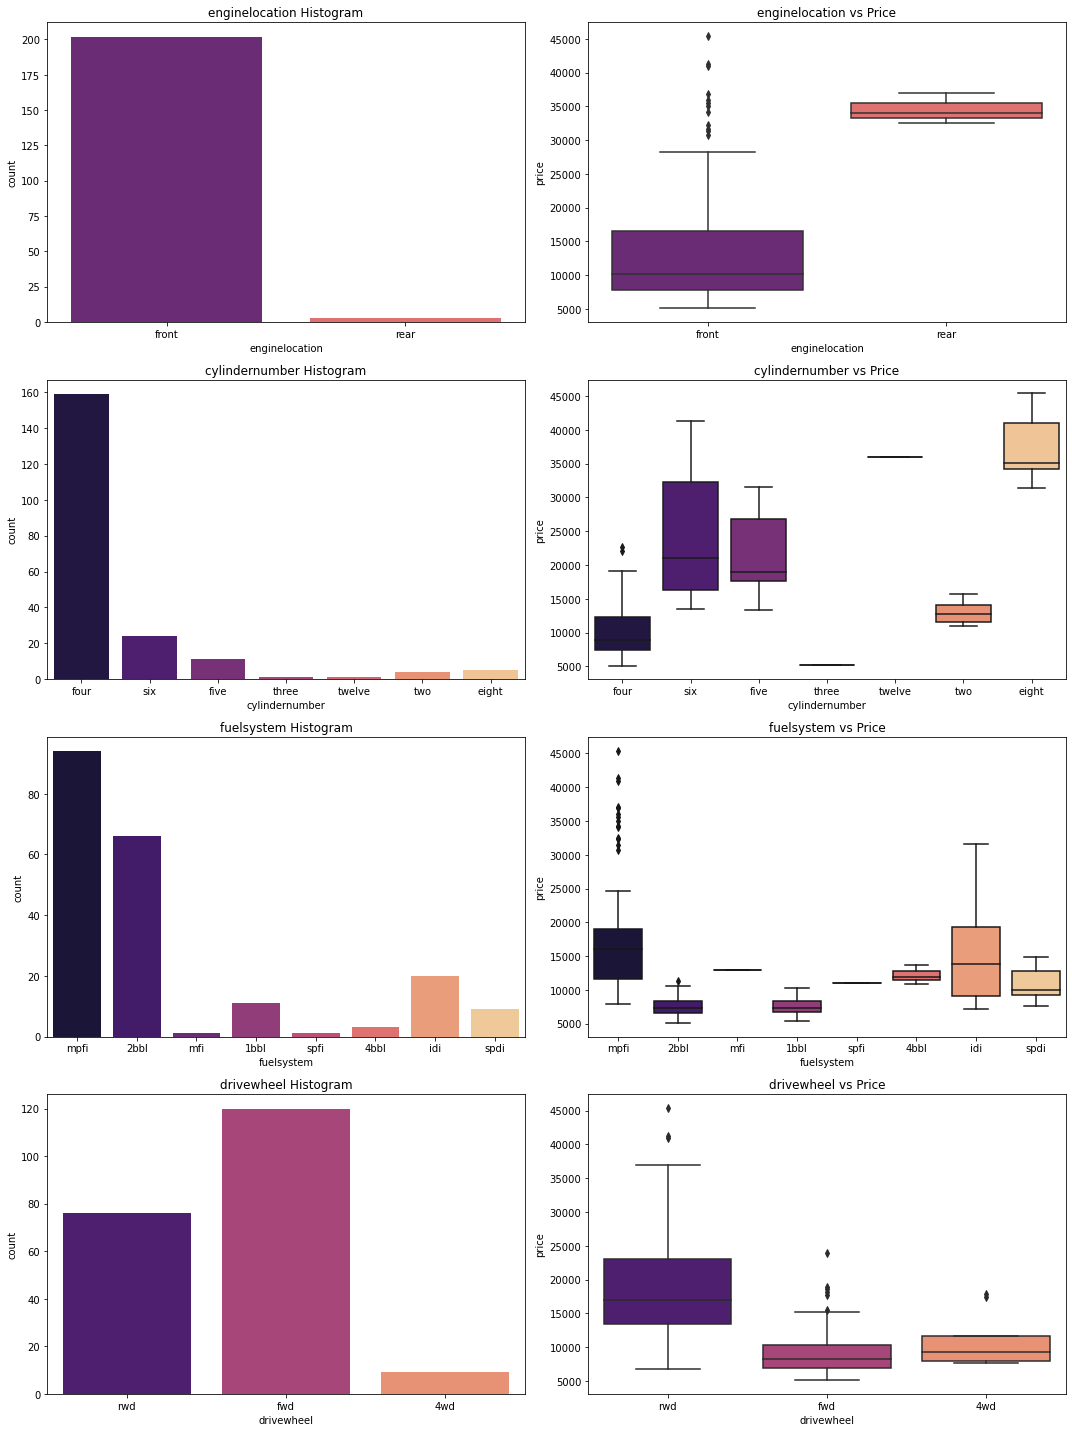

In [217]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(df[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=df[x], y=df.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

Enginelocation feature için çıkarım yapmak anlamlı değil. Çok az veri var.

Yukarıda ki  EDA sürecime göre aşağıda featurelarımı seçiyorum.

In [218]:
df["price"]=np.log(df["price"])

In [219]:
cars_lr = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth
0,9.51007,gas,std,convertible,rwd,88.60000,2548,dohc,four,130,3.47000,111,23.70000,168.80000,64.10000
1,9.71112,gas,std,convertible,rwd,88.60000,2548,dohc,four,130,3.47000,111,23.70000,168.80000,64.10000
2,9.71112,gas,std,hatchback,rwd,94.50000,2823,ohcv,six,152,2.68000,154,22.15000,171.20000,65.50000
3,9.54323,gas,std,sedan,fwd,99.80000,2337,ohc,four,109,3.19000,102,26.70000,176.60000,66.20000
4,9.76709,gas,std,sedan,4wd,99.40000,2824,ohc,five,136,3.19000,115,19.80000,176.60000,66.40000


In [220]:
#lineer regresyon için one hot encounding yapacağım ancak bazı modellerimde get dummies hali ile kullanmama gerek olmazsa diye kopyalıyorum.
#cars_lr yi ölçeklendireceğim. Tekrar ölçeksiz de denemek için df_car diye kopyalıyorum.
df_car=cars_lr.copy()

In [221]:
cars_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           205 non-null    float64
 1   fueltype        205 non-null    object 
 2   aspiration      205 non-null    object 
 3   carbody         205 non-null    object 
 4   drivewheel      205 non-null    object 
 5   wheelbase       205 non-null    float64
 6   curbweight      205 non-null    int64  
 7   enginetype      205 non-null    object 
 8   cylindernumber  205 non-null    object 
 9   enginesize      205 non-null    int64  
 10  boreratio       205 non-null    float64
 11  horsepower      205 non-null    int64  
 12  fueleconomy     205 non-null    float64
 13  carlength       205 non-null    float64
 14  carwidth        205 non-null    float64
dtypes: float64(6), int64(3), object(6)
memory usage: 24.1+ KB


In [222]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)

In [223]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,9.51007,88.60000,2548,130,3.47000,111,23.70000,168.80000,64.10000,1,...,0,0,0,0,0,1,0,0,0,0
1,9.71112,88.60000,2548,130,3.47000,111,23.70000,168.80000,64.10000,1,...,0,0,0,0,0,1,0,0,0,0
2,9.71112,94.50000,2823,152,2.68000,154,22.15000,171.20000,65.50000,1,...,0,0,1,0,0,0,1,0,0,0
3,9.54323,99.80000,2337,109,3.19000,102,26.70000,176.60000,66.20000,1,...,1,0,0,0,0,1,0,0,0,0
4,9.76709,99.40000,2824,136,3.19000,115,19.80000,176.60000,66.40000,1,...,1,0,0,0,1,0,0,0,0,0


In [224]:
cars_lr.shape

(205, 29)

In [225]:
#lineer regresyona sokmadan önce verimi ölçeklendiriyorum.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
cars_lr[num_vars] = scaler.fit_transform(cars_lr[num_vars])

In [226]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,0.44419,0.05831,0.41117,0.26038,0.66429,0.26250,0.24417,0.41343,0.31667,1,...,0,0,0,0,0,1,0,0,0,0
1,0.53629,0.05831,0.41117,0.26038,0.66429,0.26250,0.24417,0.41343,0.31667,1,...,0,0,0,0,0,1,0,0,0,0
2,0.53629,0.23032,0.51784,0.34340,0.10000,0.44167,0.20165,0.44925,0.43333,1,...,0,0,1,0,0,0,1,0,0,0
3,0.45938,0.38484,0.32933,0.18113,0.46429,0.22500,0.32647,0.52985,0.49167,1,...,1,0,0,0,0,1,0,0,0,0
4,0.56194,0.37318,0.51823,0.28302,0.46429,0.27917,0.13717,0.52985,0.50833,1,...,1,0,0,0,1,0,0,0,0,0


In [227]:
cars_lr.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
count,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,...,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000
mean,0.37300,0.35442,0.41411,0.24871,0.56411,0.23382,0.35415,0.49178,0.46732,0.90244,...,0.72195,0.07317,0.06341,0.01951,0.05366,0.77561,0.11707,0.00488,0.00488,0.01951
std,0.23081,0.17556,0.20197,0.15714,0.19346,0.16477,0.18242,0.18414,0.17877,0.29745,...,0.44913,0.26105,0.24430,0.13866,0.22589,0.41820,0.32229,0.06984,0.06984,0.13866
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.19234,0.23032,0.25485,0.13585,0.43571,0.09167,0.19616,0.37612,0.31667,1.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
50%,0.32019,0.30321,0.35919,0.22264,0.55000,0.19583,0.32647,0.47910,0.43333,1.00000,...,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
75%,0.53638,0.46064,0.56129,0.30189,0.74286,0.28333,0.46639,0.62687,0.55000,1.00000,...,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
max,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [228]:
#Bağımlı ve bağımsız değişkenlerimizi ayırıyoruz.
y = cars_lr["price"]
x = cars_lr.drop("price",axis=1)

In [229]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (164, 28)
x test:  (41, 28)
y train:  (164,)
y test:  (41,)


In [230]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [231]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     68.74
Date:                Tue, 11 May 2021   Prob (F-statistic):           6.74e-66
Time:                        22:22:16   Log-Likelihood:                 224.15
No. Observations:                 164   AIC:                            -394.3
Df Residuals:                     137   BIC:                            -310.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3715      0.130      2.865      0.005       0.115       0.628
wheelbase      -0.0027      0.092     -0.029      0.977      -0.185       0.180
curbweight      0.3426      0.140      2.444      0.016       0.065       0.620
enginesize     -0.0842      0.182     -0.463      0.644      -0.444       0.276
boreratio      -0.0608      0.070     -0.864      0.389      -0.200       0.078
horsepower      0.6960      0.127      5.491      0.000       0.445       0.947
fueleconomy    -0.1041      0.086     -1.207      0.229      -0.275       0.066
carlength       0.0177      0.111      0.159      0.874      -0.203       0.238
carwidth        0.2469      0.095      2.600      0.010       0.059       0.435
gas            -0.1240      0.035     -3.499      0.001      -0.194      -0.054
turbo          -0.0609      0.025     -2.443      0.016      -0.110      -0.012
hardtop        -0.1543      0.047     -3.272      0.001      -0.248      -0.061
hatchback      -0.1638      0.040     -4.059      0.000      -0.244      -0.084
sedan          -0.1276      0.042     -3.009      0.003      -0.211      -0.044
wagon          -0.1635      0.047     -3.473      0.001      -0.257      -0.070
fwd            -0.0036      0.035     -0.103      0.918      -0.072       0.065
rwd             0.0520      0.038      1.382      0.169      -0.022       0.126
dohcv          -0.3789      0.131     -2.886      0.005      -0.639      -0.119
l               0.0474      0.040      1.195      0.234      -0.031       0.126
ohc             0.1095      0.027      4.081      0.000       0.056       0.163
ohcf            0.1263      0.040      3.136      0.002       0.047       0.206
ohcv           -0.0512      0.039     -1.317      0.190      -0.128       0.026
rotor          -0.0404      0.064     -0.636      0.526      -0.166       0.085
five           -0.1546      0.084     -1.833      0.069      -0.321       0.012
four           -0.1944      0.095     -2.044      0.043      -0.382      -0.006
six            -0.1228      0.067     -1.833      0.069      -0.255       0.010
three        4.053e-17   1.57e-17      2.587      0.011    9.55e-18    7.15e-17
twelve         -0.2711      0.096     -2.820      0.006      -0.461      -0.081
two            -0.0404      0.064     -0.636      0.526      -0.166       0.085
==============================================================================
Omnibus:                        1.264   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.532   Jarque-Bera (JB):                1.068
Skew:                           0.197   Prob(JB):                        0.586
Kurtosis:                       3.040   Cond. No.                     1.12e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covar

In [232]:
#çok fazla boyut var ayrıca p>0.05 olarak anlamsız featurelar var. Burada RFE deneyelim.
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [233]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'carwidth', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'dohcv', 'ohcv', 'twelve'],
      dtype='object')

In [234]:
X_train = X_train[X_train.columns[rfe.support_]]
X_train.head()

,curbweight,horsepower,carwidth,hardtop,hatchback,sedan,wagon,dohcv,ohcv,twelve
106,0.64042,0.46667,0.63333,0,1,0,0,0,1,0
90,0.20520,0.02917,0.29167,0,0,1,0,0,0,0
147,0.37510,0.19167,0.42500,0,0,0,1,0,0,0
185,0.28084,0.15417,0.43333,0,0,1,0,0,0,0
95,0.20946,0.08750,0.29167,0,1,0,0,0,0,0


In [235]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     127.7
Date:                Tue, 11 May 2021   Prob (F-statistic):           5.87e-69
Time:                        22:22:17   Log-Likelihood:                 190.73
No. Observations:                 164   AIC:                            -359.5
Df Residuals:                     153   BIC:                            -325.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0684      0.039      1.735      0.085      -0.009       0.146
curbweight     0.4973      0.082      6.053      0.000       0.335       0.660
horsepower     0.5761      0.069      8.345      0.000       0.440       0.712
carwidth       0.2685      0.072      3.706      0.000       0.125       0.412
hardtop       -0.0949      0.048     -1.973      0.050      -0.190       0.000
hatchback     -0.1858      0.038     -4.909      0.000      -0.261      -0.111
sedan         -0.1423      0.037     -3.799      0.000      -0.216      -0.068
wagon         -0.2009      0.041     -4.949      0.000      -0.281      -0.121
dohcv         -0.2583      0.093     -2.769      0.006      -0.443      -0.074
ohcv          -0.0644      0.027     -2.408      0.017      -0.117      -0.012
twelve        -0.1870      0.085     -2.200      0.029      -0.355      -0.019
==============================================================================
Omnibus:                        7.331   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.522
Skew:                           0.393   Prob(JB):                       0.0233
Kurtosis:                       3.695   Cond. No.                         27.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [237]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

y_egitim_tahmini = lrm.predict(X_train)
y_test_tahmini = lrm.predict(X_test)

print("Eğitim kümesindeki R-Kare değeri  : {}".format(lrm.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(lrm.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

Eğitim kümesindeki R-Kare değeri  : 0.9288042596969572
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.8913933167878957
Ortalama Mutlak Hata (MAE)        : 0.054251776388465095
Ortalama Kare Hata (MSE)          : 0.005371126501219342
Kök Ortalama Kare Hata (RMSE)     : 0.07328796968957008
Ortalama Mutlak Yüzde Hata (MAPE) : inf


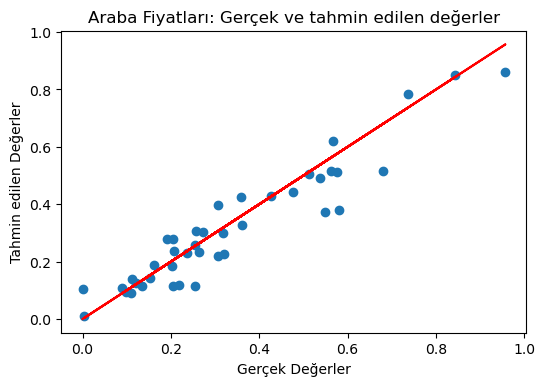

In [238]:
plt.figure(dpi = 100)
plt.scatter(y_test, y_test_tahmini)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin edilen Değerler")
plt.title("Araba Fiyatları: Gerçek ve tahmin edilen değerler")
plt.show()

In [239]:
from sklearn.model_selection import cross_validate, cross_val_score


In [240]:
lrm = LinearRegression()
cv = cross_validate(estimator=lrm,
                     X=x,
                     y=y,
                     cv=4,
                    )
print('Test Skorları            : ', cv['test_score'], sep = '\n')
print("-"*50)
#print('Eğitim Skorları          : ', cv['train_score'], sep = '\n')

Test Skorları            : 
[0.88173138 0.78509665 0.77071518 0.42355471]
--------------------------------------------------


In [241]:
print('Test Kümesi   Ortalaması : ', cv['test_score'].mean())

Test Kümesi   Ortalaması :  0.7152744818461423


Düşük bir r^2 değeri. Ya modelimde eda sürecimde bir sıkıntı var ya da regresyonda.
boyut olarak fazla. Lineer regresyonda ideal boyut sayısı 6-7 olduğu için olabilir.

In [242]:
#Regularization yapalım.
#Ridge regresyon deneyelim.

from sklearn.linear_model import Ridge

ridgeregr = Ridge(alpha=0.1) 
ridgeregr.fit(X_train, y_train)


y_egitim_tahmini = ridgeregr.predict(X_train)
y_test_tahmini = ridgeregr.predict(X_test)

print("Eğitim kümesindeki R-Kare değeri  : {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(ridgeregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

Eğitim kümesindeki R-Kare değeri  : 0.9267847480649263
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.8892943083580406
Ortalama Mutlak Hata (MAE)        : 0.056235388837722465
Ortalama Kare Hata (MSE)          : 0.005474932634234749
Kök Ortalama Kare Hata (RMSE)     : 0.07399278771768739
Ortalama Mutlak Yüzde Hata (MAPE) : inf


In [243]:
ridgeregr = Ridge(alpha=0.1) 
cv = cross_validate(estimator=ridgeregr,
                     X=x,
                     y=y,
                     cv=4,
                    )
print('Test Skorları            : ', cv['test_score'], sep = '\n')
print("-"*50)
#print('Eğitim Skorları          : ', cv['train_score'], sep = '\n')

Test Skorları            : 
[0.88954979 0.83444324 0.78297185 0.50629511]
--------------------------------------------------


In [244]:
print('Test Kümesi   Ortalaması : ', cv['test_score'].mean())

Test Kümesi   Ortalaması :  0.7533149968306998


ridge regresyonda alpha parametresinin en iyisini bulmak için grid search deneyelim.

In [245]:
parametreler = {"alpha": [10 ** x for x in range (-5, 5, 1)]
                }

In [246]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator=ridgeregr,
                       param_grid = parametreler,
                       cv = 5
                      )
grid_cv.fit(x, y)

GridSearchCV(cv=5, estimator=Ridge(alpha=0.1),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000, 10000]})

In [247]:
print("En iyi parametreler : ", grid_cv.best_params_)
print("En iyi skor         : ", grid_cv.best_score_)

En iyi parametreler :  {'alpha': 1}
En iyi skor         :  0.7403357107484048


alpha 1 olarak tekrar ridge modeli ile eğitince modelin eğitim ve test parametresinin birbirine yaklaştığı görülür. 

In [248]:
from sklearn.linear_model import Ridge

ridgeregr = Ridge(alpha=1) 
ridgeregr.fit(X_train, y_train)

y_egitim_tahmini = ridgeregr.predict(X_train)
print("Eğitim kümesi R-Kare değeri       : {}".format(ridgeregr.score(X_train, y_train)))

ridgeregr.fit(X_test, y_test)
y_test_tahmini = ridgeregr.predict(X_test)


print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(ridgeregr.score(X_test, y_test)))

Eğitim kümesi R-Kare değeri       : 0.9107897869205775
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.9205730487221634


In [249]:
#Lasso regresyon uygulayalım.
from sklearn.linear_model import Lasso

#lassoregr = Lasso(alpha=10**20.5) 
lassoregr = Lasso(alpha=0.01)
lassoregr.fit(X_train, y_train)

y_egitim_tahmini = lassoregr.predict(X_train)
print("Eğitim kümesi R-Kare değeri       : {}".format(lassoregr.score(X_train, y_train)))

lassoregr.fit(X_test, y_test)
y_test_tahmini = lassoregr.predict(X_test)


print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(lassoregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

Eğitim kümesi R-Kare değeri       : 0.7855462821538475
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.8203760344628359
Ortalama Mutlak Hata (MAE)        : 0.07288179029128206
Ortalama Kare Hata (MSE)          : 0.00888327507126418
Kök Ortalama Kare Hata (RMSE)     : 0.09425112769226786
Ortalama Mutlak Yüzde Hata (MAPE) : inf


In [250]:
#Lasso içinde en iyi parametreyi bulmak için random search deneyelim.

parametreler = {"alpha": [10 ** x for x in range (-5, 5, 1)]
                }

In [251]:
from sklearn.model_selection import RandomizedSearchCV
rs_cv = RandomizedSearchCV(estimator=lassoregr,
                           param_distributions = parametreler,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                      )
rs_cv.fit(x, y)

RandomizedSearchCV(cv=10, estimator=Lasso(alpha=0.01),
                   param_distributions={'alpha': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1, 1, 10, 100, 1000,
                                                  10000]},
                   random_state=111)

In [252]:
print("En iyi parametreler        : ", rs_cv.best_params_)

En iyi parametreler        :  {'alpha': 0.001}


In [253]:
#random search sonunda bulduğum en iyi parametre ile tekrar eğitelim ve R^2 bakalım.
lassoregr = Lasso(alpha=1e-05)
lassoregr.fit(X_train, y_train)

y_egitim_tahmini = lassoregr.predict(X_train)
print("Eğitim kümesi R-Kare değeri       : {}".format(lassoregr.score(X_train, y_train)))

lassoregr.fit(X_test, y_test)
y_test_tahmini = lassoregr.predict(X_test)


print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(lassoregr.score(X_test, y_test)))

Eğitim kümesi R-Kare değeri       : 0.9287744680304252
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.9705587704387602


K-nn algoritması ile model oluşturalım.

In [254]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=4)

In [255]:
knn.score(X_train,y_train)

0.900192869401955

In [256]:
knn.fit(X_test,y_test)

y_test_tahmini=knn.predict(X_test)

In [257]:
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(knn.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.785712329787234
Ortalama Mutlak Hata (MAE)        : 0.07284491254330558
Ortalama Kare Hata (MSE)          : 0.01059756315471442
Kök Ortalama Kare Hata (RMSE)     : 0.10294446636276483
Ortalama Mutlak Yüzde Hata (MAPE) : inf


knn de test ve eğitim kümesi performansında çok fark var. Overfitting olabilir.

In [258]:
from sklearn.model_selection import cross_val_score
cvscores_2 = cross_val_score(knn, X_test, y_test, cv=3)
print('cv =  2 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_2))
# Perform 10-fold CV
cvscores_5 = cross_val_score(knn, X_test, y_test, cv=5)
print('cv = 5 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_5))

cv =  2 ---> Ortalama çarpraz doğrulama skoru :  0.2830120139504469
cv = 5 ---> Ortalama çarpraz doğrulama skoru :  0.42509806718650334


In [259]:
#svm uygulayalım.
from sklearn.metrics import mean_squared_error as MSE
from sklearn.svm import SVR

svr_reg = SVR(kernel='linear', C=1)
svr_reg.fit(X_train, y_train)
svr_reg.score(X_train,y_train)

0.9146862297800071

In [260]:
svr_reg.fit(X_test,y_test)
svr_reg.score(X_test,y_test)

0.9094018759162725

In [261]:
y_tahmin = svr_reg.predict(X_test)
rmse_test = MSE(y_test, y_tahmin)**(1/2)
print("RMSE değeri (Kernel = linear): {:.2f}".format(rmse_test))

RMSE değeri (Kernel = linear): 0.07


In [262]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf'],} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=0.1, 

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [263]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVR(C=100, gamma=0.1)


In [264]:
grid.score(X_train, y_train)

0.9207179384464634

In [265]:
grid.fit(X_test, y_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=0.1, 

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [266]:
grid.score(X_test, y_test)

0.9128159659005776

In [267]:
y_tahmin = grid.predict(X_test)
rmse_test = MSE(y_test, y_tahmin)**(1/2)
print("RMSE değeri (Kernel = rbf): {:.2f}".format(rmse_test))

RMSE değeri (Kernel = rbf): 0.07


Yukarıda svm uygularken grid seacrh yapıp en iyi parametreyi bulup uyguladığımızda modelde eğitim test r^2 sinde iyileşme ve rmse hata metriğimizde düşme gördük.

In [268]:
#Random Forest deneyelim.(ölçekli veri üzerinden.)
from sklearn.ensemble import RandomForestRegressor
rastgele_orman = RandomForestRegressor(n_estimators=5, random_state=2)
rastgele_orman.fit(X_train, y_train) 
rastgele_orman.score(X_train, y_train) 

0.9799119366484067

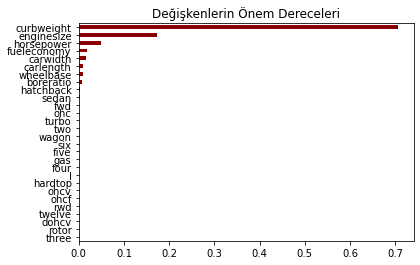

In [269]:
önem_dereceleri = pd.Series(data=rastgele_orman.feature_importances_,
                        index= X_train.columns)

önem_dereceleri_sıralı = önem_dereceleri.sort_values()

önem_dereceleri_sıralı.plot(kind='barh', color='darkred')
plt.title('Değişkenlerin Önem Dereceleri')
plt.show()

In [270]:
rastgele_orman.fit(X_test, y_test)
rastgele_orman.score(X_test, y_test) 

0.9536468768236692

In [271]:
y_tahmin = rastgele_orman.predict(X_test)
rmse_test = MSE(y_test, y_tahmin)**(1/2)
print("RMSE değeri (Rastgele Orman): {:.2f}".format(rmse_test))

RMSE değeri (Rastgele Orman): 0.05


In [272]:
#random forest bir de tek bir ağaç ile yapalım.
from sklearn.tree import DecisionTreeRegressor
karar_agacı_reg = DecisionTreeRegressor(max_depth=4, random_state=111)
karar_agacı_reg.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=4, random_state=111)

In [273]:
karar_agacı_reg.score(X_train, y_train)

0.9482981966584092

In [274]:
karar_agacı_reg.fit(X_test, y_test)
y_tahmin = karar_agacı_reg.predict(X_test)
rmse_test = MSE(y_test, y_tahmin)**(1/2)
print("RMSE değeri (Karar Ağacı): {:.2f}".format(rmse_test))

RMSE değeri (Karar Ağacı): 0.02


random forest ve decision tree ile kıyasladığımızda random forestte rmse değeri daha düşük olduğu görülür.

In [275]:
#xgboost algoritmasını kullanırken ölçeklenmemiş veri setimizi deneyelim.
df_car.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth
0,9.51007,gas,std,convertible,rwd,88.60000,2548,dohc,four,130,3.47000,111,23.70000,168.80000,64.10000
1,9.71112,gas,std,convertible,rwd,88.60000,2548,dohc,four,130,3.47000,111,23.70000,168.80000,64.10000
2,9.71112,gas,std,hatchback,rwd,94.50000,2823,ohcv,six,152,2.68000,154,22.15000,171.20000,65.50000
3,9.54323,gas,std,sedan,fwd,99.80000,2337,ohc,four,109,3.19000,102,26.70000,176.60000,66.20000
4,9.76709,gas,std,sedan,4wd,99.40000,2824,ohc,five,136,3.19000,115,19.80000,176.60000,66.40000


In [276]:
x_olceksiz=df_car.drop("price",axis=1)
y_olceksiz=df_car["price"]

In [277]:
x_olceksiz = pd.get_dummies(x_olceksiz, drop_first=True)

In [278]:
X_olceksiz_train, X_olceksiz_test, y_olceksiz_train, y_olceksiz_test = train_test_split(x_olceksiz, y_olceksiz, test_size=0.2, random_state=123)

In [279]:
#xgboost
import xgboost as xgb 
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=123)
xg_reg.fit(X_olceksiz_train,y_olceksiz_train)
xg_reg.score(X_olceksiz_train,y_olceksiz_train)

0.9988754672484768

In [280]:
xg_reg.fit(X_olceksiz_test,y_olceksiz_test)
xg_reg.score(X_olceksiz_test,y_olceksiz_test)

0.9999945922716157

In [281]:
#Xgboost ile çapraz doğrulama
araba_fiyatlari_dmatrix = xgb.DMatrix(data=x_olceksiz, label=y_olceksiz)
params = {"objective":"reg:squarederror", "max_depth":4}
araba_fiyatlari_cv = xgb.cv(dtrain=araba_fiyatlari_dmatrix, params=params, nfold=4, 
                    num_boost_round=100, early_stopping_rounds = 5, metrics="rmse", as_pandas=True, seed=123)
display(araba_fiyatlari_cv.sort_values(by='test-rmse-mean').head(5))

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
36,0.04175,0.00285,0.14997,0.01325
35,0.04276,0.00311,0.15009,0.01296
32,0.04654,0.00315,0.15021,0.01262
33,0.04543,0.00293,0.15030,0.01297
27,0.05620,0.00366,0.15038,0.01191


In [282]:
#Xgboost ile regularizasyon
araba_fiyatlari_dmatrix = xgb.DMatrix(data=x_olceksiz, label=y_olceksiz)
l1_params = np.arange(0.01, 0.2, 0.01)
params = {"objective":"reg:squarederror","max_depth":3}
rmses_l1 = []
for alpha in l1_params:
    params["alpha"] = alpha
    cv_rmse = xgb.cv(dtrain=araba_fiyatlari_dmatrix, params=params, nfold=4, num_boost_round=100, 
                             metrics="rmse", as_pandas=True, early_stopping_rounds=10, seed=123)
    rmses_l1.append(cv_rmse["test-rmse-mean"].tail(1).values[0])
    

In [283]:
#alpha değerini en iyi değerini bulalım. Gamma ve lambda içinde aynısını yapıp bulalım.
print("En iyi l1 değerleri:")
en_iyi_degerler = pd.DataFrame(list(zip(l1_params, rmses_l1)), columns=["l1", "rmse"])
display(en_iyi_degerler.sort_values('rmse').head())

En iyi l1 değerleri:


,l1,rmse
2,0.03000,0.14569
1,0.02000,0.14804
4,0.05000,0.14863
8,0.09000,0.14881
18,0.19000,0.15015


In [284]:
#Grid search ile xgboost parametreleri bulalım.
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma':  [0.1, 0.01, 0.05]
}

In [285]:
xg_reg = xgb.XGBRegressor()
grid_search = GridSearchCV(xg_reg, param_grid=parameters,n_jobs = -1,cv = 5,verbose=2)

In [286]:
grid_search.fit(x, y)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [287]:
grid_search.score(x,y)

0.9602721339060063

In [288]:
best=grid_search.best_params_
best

{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 180}

In [289]:
xgboost = xgb.XGBRegressor()
xgb_tuned =  xgboost.fit(X_train,y_train)

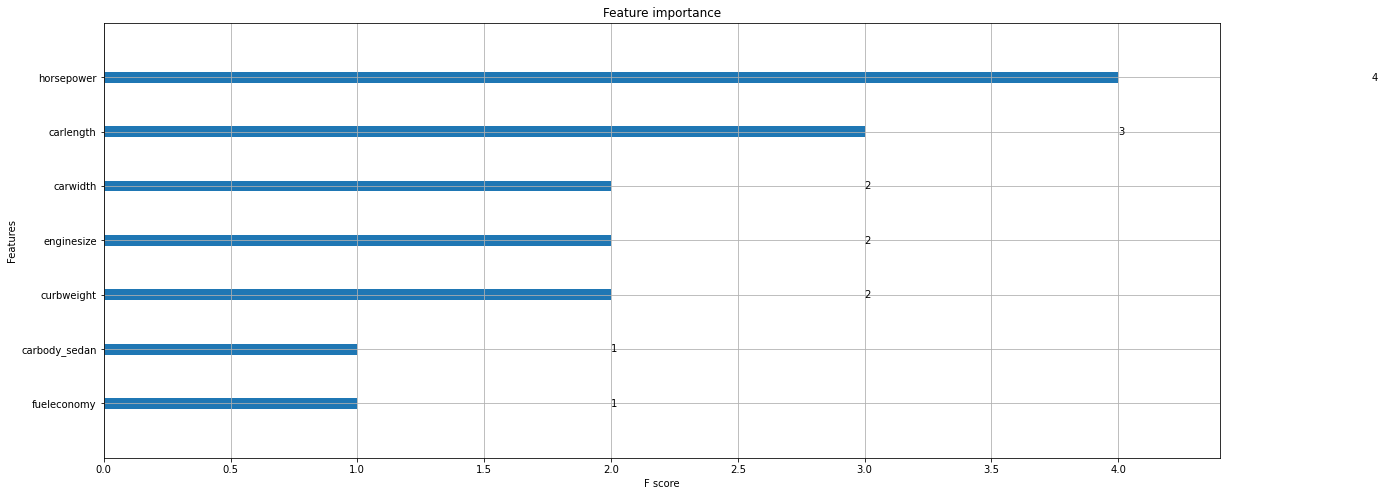

In [290]:
import matplotlib.pyplot as plt
araba_fiyatlari_dmatrix = xgb.DMatrix(data=x_olceksiz, label=y_olceksiz)

en_iyi_parametreler = {'objective':'reg:squarederror',
                       'colsample_bytree': 0.7, 
                       'gamma': 0.1, 
                       'learning_rate': 0.3, 
                       'max_depth': 3, 
                       'min_child_weight': 3
                      }

araba_fiyatlari_modeli = xgb.train(params=en_iyi_parametreler, dtrain=araba_fiyatlari_dmatrix, num_boost_round=10)

ax = xgb.plot_importance(araba_fiyatlari_modeli)
ax.figure.set_size_inches(20,8)
plt.show()

Buraya kadar öğrendiklerimi uyguladım. Biraz karıştırdım. Bu sırada eğitim test performansı ve cross validation yaptıktan sonraki ortalama performansta çok fark oldu. Bunları silmek istemedim deneme amaçlı olması için. Modellerde uyguladığım bir çok adım aynı olduğunu fark ettim. O yüzden burada bir fonksiyon üzerinden yapıp hepsinin performansını karşılaştıracağım. Aşağıda yukarıda modellediklerimin daha düzenlenmiş halleri mevcut.

In [291]:
from sklearn.metrics import r2_score
cv=5 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean
rmse_hata = []

# Main function for models
def model(algorithm,x_train_,y_train_,x_test_,y_test_): 
    algorithm.fit(x_train_,y_train_)
    predicts=algorithm.predict(x_test_)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test_,prediction)
    cross_val=cross_val_score(algorithm,x_train_,y_train_,cv=cv)
    RMSE=rmse(y_test_,predicts)
    
    # Appending results to Lists 
    r_2.append(R_2)
    CV.append(cross_val.mean())
    rmse_hata.append(RMSE)
    
    # Printing results  
    print(algorithm,"\n") 
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean(),"\n")
    print("RMSE :",rmse(y_test_,predicts))
    
    
    # Plot for prediction vs originals
    test_index=y_test_.reset_index()["price"]
    ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
    ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()

In [292]:
#Ölçeklendirilmemiş ama one hot encounding yapılmış veri seti.
#yukarıda tek tek baktıklarımda ölçeklenmiş veri seti ile yaptım aşağıda ölçeklenmemiş ile yapacağım.

df_car.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth
0,9.51007,gas,std,convertible,rwd,88.60000,2548,dohc,four,130,3.47000,111,23.70000,168.80000,64.10000
1,9.71112,gas,std,convertible,rwd,88.60000,2548,dohc,four,130,3.47000,111,23.70000,168.80000,64.10000
2,9.71112,gas,std,hatchback,rwd,94.50000,2823,ohcv,six,152,2.68000,154,22.15000,171.20000,65.50000
3,9.54323,gas,std,sedan,fwd,99.80000,2337,ohc,four,109,3.19000,102,26.70000,176.60000,66.20000
4,9.76709,gas,std,sedan,4wd,99.40000,2824,ohc,five,136,3.19000,115,19.80000,176.60000,66.40000


In [293]:
df_car=pd.get_dummies(df_car,drop_first=True)

In [294]:
df_car.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fueltype_gas,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,9.51007,88.60000,2548,130,3.47000,111,23.70000,168.80000,64.10000,1,...,0,0,0,0,0,1,0,0,0,0
1,9.71112,88.60000,2548,130,3.47000,111,23.70000,168.80000,64.10000,1,...,0,0,0,0,0,1,0,0,0,0
2,9.71112,94.50000,2823,152,2.68000,154,22.15000,171.20000,65.50000,1,...,0,0,1,0,0,0,1,0,0,0
3,9.54323,99.80000,2337,109,3.19000,102,26.70000,176.60000,66.20000,1,...,1,0,0,0,0,1,0,0,0,0
4,9.76709,99.40000,2824,136,3.19000,115,19.80000,176.60000,66.40000,1,...,1,0,0,0,1,0,0,0,0,0


In [295]:
df_car.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fueltype_gas,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
count,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,...,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000
mean,9.35468,98.75659,2555.56585,126.90732,3.32976,104.11707,27.70878,174.04927,65.90780,0.90244,...,0.72195,0.07317,0.06341,0.01951,0.05366,0.77561,0.11707,0.00488,0.00488,0.01951
std,0.50381,6.02178,520.68020,41.64269,0.27084,39.54417,6.64918,12.33729,2.14520,0.29745,...,0.44913,0.26105,0.24430,0.13866,0.22589,0.41820,0.32229,0.06984,0.06984,0.13866
min,8.54052,86.60000,1488.00000,61.00000,2.54000,48.00000,14.80000,141.10000,60.30000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,8.96034,94.50000,2145.00000,97.00000,3.15000,70.00000,21.95000,166.30000,64.10000,1.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
50%,9.23941,97.00000,2414.00000,120.00000,3.31000,95.00000,26.70000,173.20000,65.50000,1.00000,...,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
75%,9.71130,102.40000,2935.00000,141.00000,3.58000,116.00000,31.80000,183.10000,66.90000,1.00000,...,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
max,10.72327,120.90000,4066.00000,326.00000,3.94000,288.00000,51.25000,208.10000,72.30000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [296]:
X=df_car.drop("price",axis=1)
y=df_car["price"]

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

LinearRegression() 

r_2 score : 0.8671153506567367 

CV scores: [0.85462809 0.87801498 0.87781799 0.91367774 0.7615322 ] 

CV scores mean: 0.8571341987978105 

RMSE : 0.1745926309439961


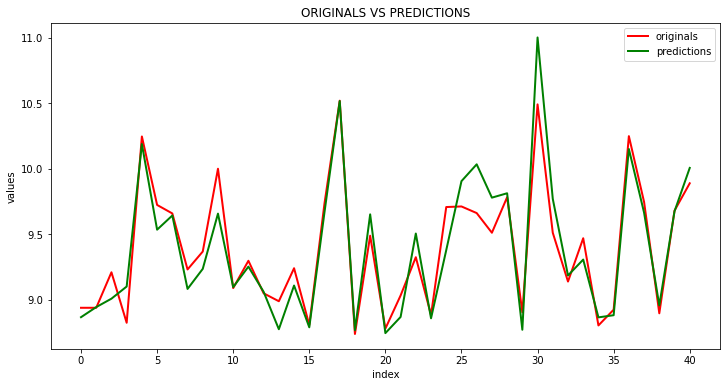

In [298]:
#lineer regresyon
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,X_train,y_train,X_test,y_test)

In [299]:
#Lasso
alphas = np.logspace(-3,3,num=14) # range for alpha

grid = GridSearchCV(estimator=Lasso(), param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.8840798930107996
0.0028942661247167516


Lasso(alpha=0.0028942661247167516, normalize=True) 

r_2 score : 0.8327735681658107 

CV scores: [0.89294037 0.87710447 0.86988924 0.88358667 0.82979056] 

CV scores mean: 0.8706622630289665 

RMSE : 0.19585784136849302


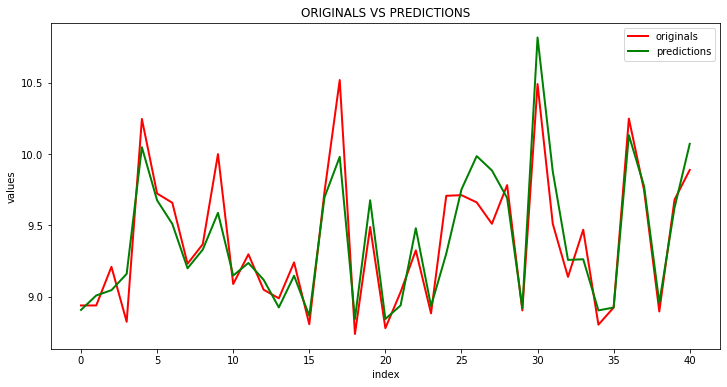

In [300]:
ls = Lasso(alpha = grid.best_estimator_.alpha, normalize = True) # applied the best estimator
model(ls,X_train,y_train,X_test,y_test)

In [301]:
#Ridge
alphas = np.logspace(-3,3,num=14) # range for alpha

grid2 = GridSearchCV(estimator=Ridge(), param_grid=dict(alpha=alphas)) 
grid2.fit(X_train, y_train)

print(grid2.best_score_)
print(grid2.best_estimator_.alpha)

0.8712838815799355
4.923882631706742


Ridge(alpha=0.01, normalize=True) 

r_2 score : 0.862831353288025 

CV scores: [0.85265725 0.89834993 0.87552024 0.91167766 0.79087762] 

CV scores mean: 0.8658165412118004 

RMSE : 0.1773846065607918


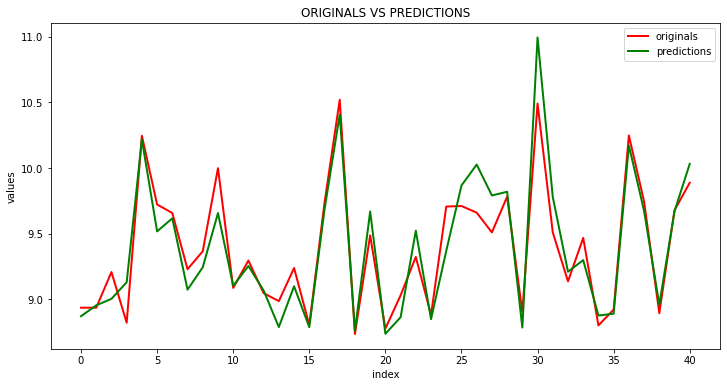

In [302]:
ridge = Ridge(alpha = 0.01, normalize = True) # applied the best estimator
model(ridge,X_train,y_train,X_test,y_test)

DecisionTreeRegressor() 

r_2 score : 0.7746198932240873 

CV scores: [0.86562368 0.89787816 0.77162492 0.78371193 0.74551084] 

CV scores mean: 0.8128699066999973 

RMSE : 0.22737687439455143


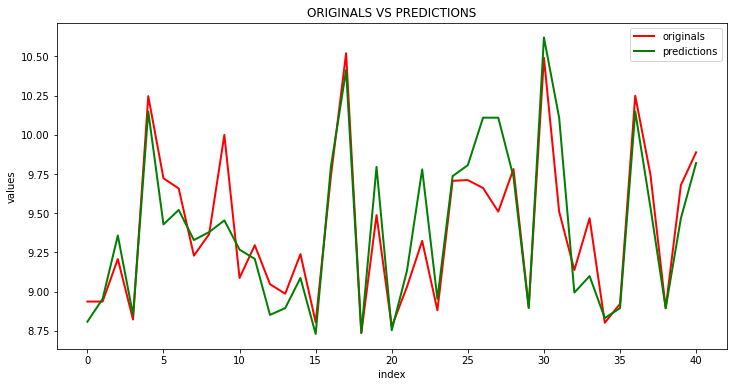

In [303]:
#decision tree
dtr = DecisionTreeRegressor()
model(dtr,X_train,y_train,X_test,y_test)

RandomForestRegressor(random_state=42) 

r_2 score : 0.9074935942165634 

CV scores: [0.94741889 0.92818119 0.87418604 0.87197591 0.88232531] 

CV scores mean: 0.9008174681723877 

RMSE : 0.14567143744147232


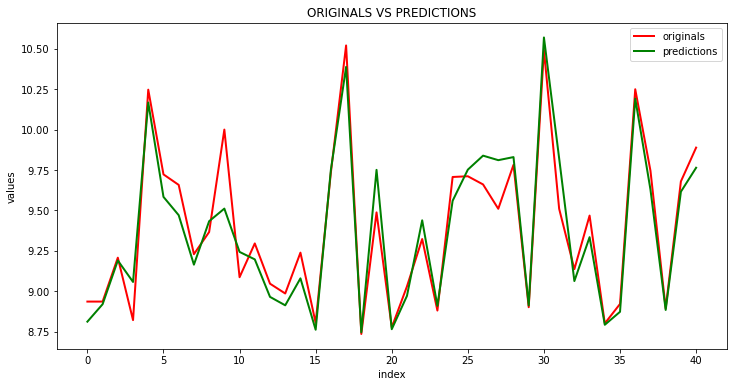

In [304]:
#random forest
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
model(rf,X_train,y_train,X_test,y_test)

KNeighborsRegressor(n_neighbors=4) 

r_2 score : 0.7942184077743222 

CV scores: [0.78661797 0.83210136 0.70363879 0.78563441 0.81476772] 

CV scores mean: 0.7845520499913671 

RMSE : 0.21726599743629313


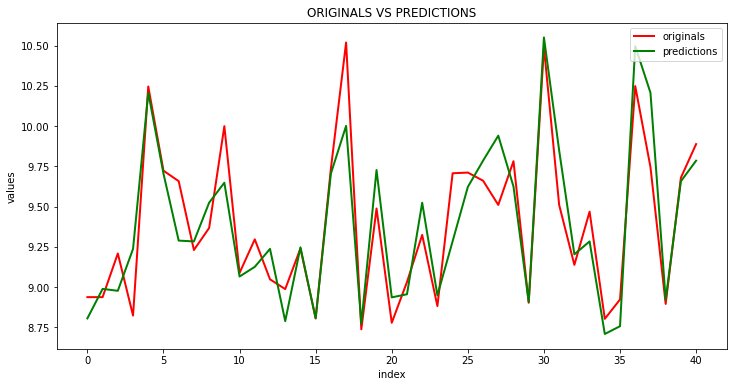

In [305]:
#knn
knn = KNeighborsRegressor(n_neighbors=4)
model(knn,X_train,y_train,X_test,y_test)

SVR(C=5) 

r_2 score : 0.7541134006019057 

CV scores: [0.81343977 0.879795   0.73229999 0.8487389  0.84074332] 

CV scores mean: 0.8230033972398209 

RMSE : 0.23749579928217035


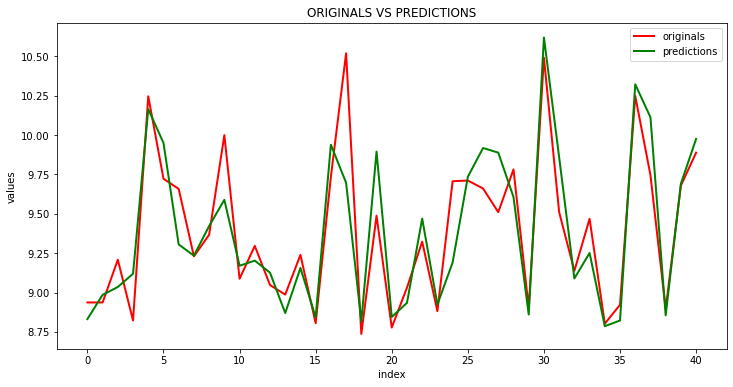

In [306]:
#Support vector machine
svr_reg = SVR(kernel='rbf', C=5)
model(svr_reg,X_train,y_train,X_test,y_test)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None) 

r_2 score : 0.8730839790070042 

CV scores: [0.88986545 0.91301262 0.89008016 0.87517336 0.87550618] 

CV scores mean: 0.8887275547593252 

RMSE : 0.17062659572750566


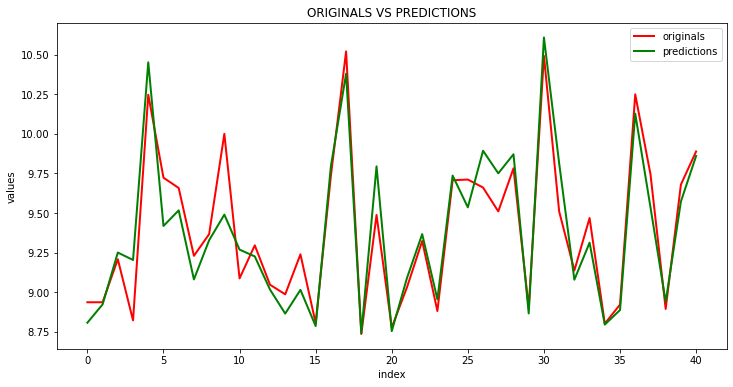

In [307]:
#Xgboost
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=123)
model(xg_reg,X_train,y_train,X_test,y_test)


In [308]:
#hepsini karşılaştıralım.
Model = ["LinearRegression","Lasso","Ridge","DecisionTreeRegressor","RandomForestRegressor","KNN","Support Vector Machine","Xgboost"]
results=pd.DataFrame({'Model': Model,'R Squared': r_2,'CV score mean': CV,'RMSE':rmse_hata})
#results=pd.DataFrame({'R Squared': r_2,'CV score mean': CV})
results

,Model,R Squared,CV score mean,RMSE
0,LinearRegression,0.86712,0.85713,0.17459
1,Lasso,0.83277,0.87066,0.19586
2,Ridge,0.86283,0.86582,0.17738
3,DecisionTreeRegressor,0.77462,0.81287,0.22738
4,RandomForestRegressor,0.90749,0.90082,0.14567
5,KNN,0.79422,0.78455,0.21727
6,Support Vector Machine,0.75411,0.82300,0.23750
7,Xgboost,0.87308,0.88873,0.17063


Yukarıda ki sonuçlarıma göre burada random forest modelimi seçerdim. r^2 en yüksek ve rmse değeri en düşük olarak.
Burada svm ve knn çok düşük bir performans göstermiş. 

Bir de ölçekli veri ile bu fonksiyonu tekrar çalıştıralım.

In [309]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,0.44419,0.05831,0.41117,0.26038,0.66429,0.26250,0.24417,0.41343,0.31667,1,...,0,0,0,0,0,1,0,0,0,0
1,0.53629,0.05831,0.41117,0.26038,0.66429,0.26250,0.24417,0.41343,0.31667,1,...,0,0,0,0,0,1,0,0,0,0
2,0.53629,0.23032,0.51784,0.34340,0.10000,0.44167,0.20165,0.44925,0.43333,1,...,0,0,1,0,0,0,1,0,0,0
3,0.45938,0.38484,0.32933,0.18113,0.46429,0.22500,0.32647,0.52985,0.49167,1,...,1,0,0,0,0,1,0,0,0,0
4,0.56194,0.37318,0.51823,0.28302,0.46429,0.27917,0.13717,0.52985,0.50833,1,...,1,0,0,0,1,0,0,0,0,0


In [310]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
#cars_lr[num_vars] = scaler.fit_transform(cars_lr[num_vars])

In [311]:
cars_lr.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
count,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,...,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000
mean,0.37300,0.35442,0.41411,0.24871,0.56411,0.23382,0.35415,0.49178,0.46732,0.90244,...,0.72195,0.07317,0.06341,0.01951,0.05366,0.77561,0.11707,0.00488,0.00488,0.01951
std,0.23081,0.17556,0.20197,0.15714,0.19346,0.16477,0.18242,0.18414,0.17877,0.29745,...,0.44913,0.26105,0.24430,0.13866,0.22589,0.41820,0.32229,0.06984,0.06984,0.13866
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.19234,0.23032,0.25485,0.13585,0.43571,0.09167,0.19616,0.37612,0.31667,1.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
50%,0.32019,0.30321,0.35919,0.22264,0.55000,0.19583,0.32647,0.47910,0.43333,1.00000,...,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
75%,0.53638,0.46064,0.56129,0.30189,0.74286,0.28333,0.46639,0.62687,0.55000,1.00000,...,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
max,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [312]:
X=cars_lr.drop("price",axis=1)
y=cars_lr["price"]

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [314]:
from sklearn.metrics import r2_score
cv=5 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean
rmse_hata = []

# Main function for models
def model(algorithm,x_train_,y_train_,x_test_,y_test_): 
    algorithm.fit(x_train_,y_train_)
    predicts=algorithm.predict(x_test_)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test_,prediction)
    cross_val=cross_val_score(algorithm,x_train_,y_train_,cv=cv)
    RMSE=rmse(y_test_,predicts)
    
    # Appending results to Lists 
    r_2.append(R_2)
    CV.append(cross_val.mean())
    rmse_hata.append(RMSE)
    
    # Printing results  
    print(algorithm,"\n") 
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean(),"\n")
    print("RMSE :",rmse(y_test_,predicts))
    
    
    # Plot for prediction vs originals
    test_index=y_test_.reset_index()["price"]
    ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
    ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()

LinearRegression() 

r_2 score : 0.8671153506567406 

CV scores: [0.85462809 0.87801498 0.87781799 0.91367774 0.7615322 ] 

CV scores mean: 0.8571341987978107 

RMSE : 0.07998752103486102


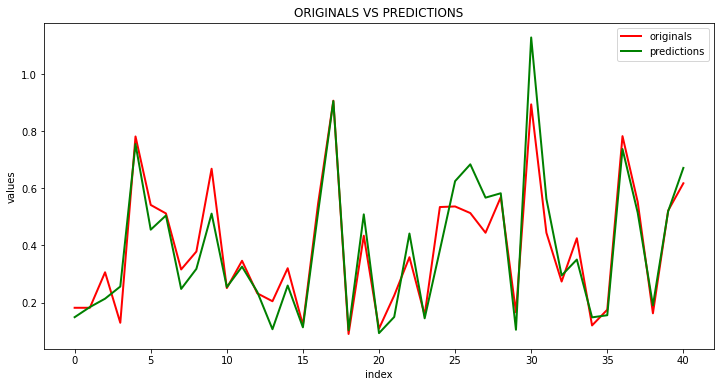

In [315]:
#lineer regresyon
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,X_train,y_train,X_test,y_test)

In [316]:
#Lasso
alphas = np.logspace(-5,5,num=14) # range for alpha

grid = GridSearchCV(estimator=Lasso(), param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.884428253827204
0.002030917620904737


Lasso(alpha=0.002030917620904737, normalize=True) 

r_2 score : 0.8337728414549417 

CV scores: [0.87627861 0.86711507 0.83589262 0.86497648 0.83083648] 

CV scores mean: 0.8550198513976024 

RMSE : 0.08946142685507541


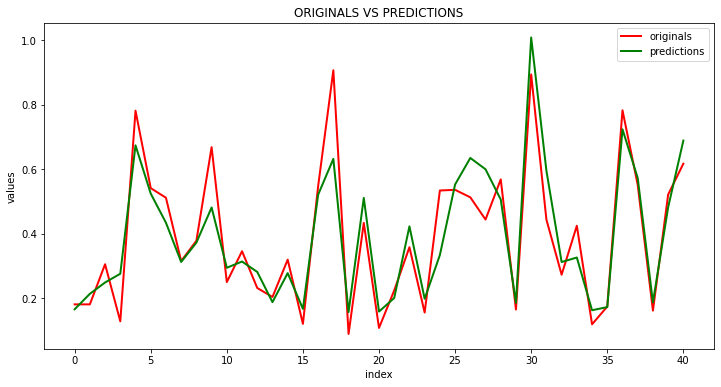

In [317]:
ls = Lasso(alpha = grid.best_estimator_.alpha, normalize = True) # applied the best estimator
model(ls,X_train,y_train,X_test,y_test)

In [318]:
#Ridge
alphas = np.logspace(-3,3,num=14) # range for alpha

grid2 = GridSearchCV(estimator=Ridge(), param_grid=dict(alpha=alphas)) 
grid2.fit(X_train, y_train)

print(grid2.best_score_)
print(grid2.best_estimator_.alpha)

0.8691565896642764
0.2030917620904737


Ridge(alpha=0.01, normalize=True) 

r_2 score : 0.8628313532880247 

CV scores: [0.85265725 0.89834993 0.87552024 0.91167766 0.79087762] 

CV scores mean: 0.8658165412118004 

RMSE : 0.08126663119644117


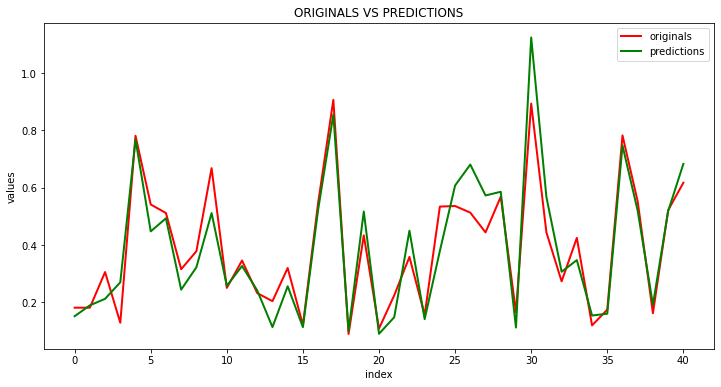

In [319]:
ridge = Ridge(alpha = 0.01, normalize = True) # applied the best estimator
model(ridge,X_train,y_train,X_test,y_test)

DecisionTreeRegressor() 

r_2 score : 0.7587382246488203 

CV scores: [0.82245239 0.91301133 0.75591108 0.79365084 0.8203158 ] 

CV scores mean: 0.8210682857143283 

RMSE : 0.10777774423766334


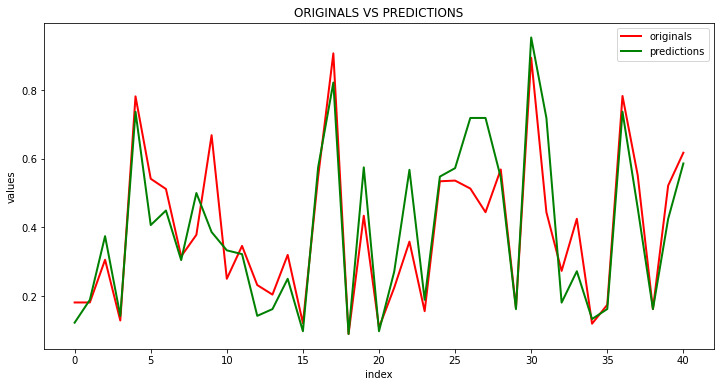

In [320]:
#decision tree
dtr = DecisionTreeRegressor()
model(dtr,X_train,y_train,X_test,y_test)

RandomForestRegressor(random_state=42) 

r_2 score : 0.9101964014338999 

CV scores: [0.94368086 0.92742267 0.87464797 0.87421434 0.88219958] 

CV scores mean: 0.9004330833916949 

RMSE : 0.06575544178273877


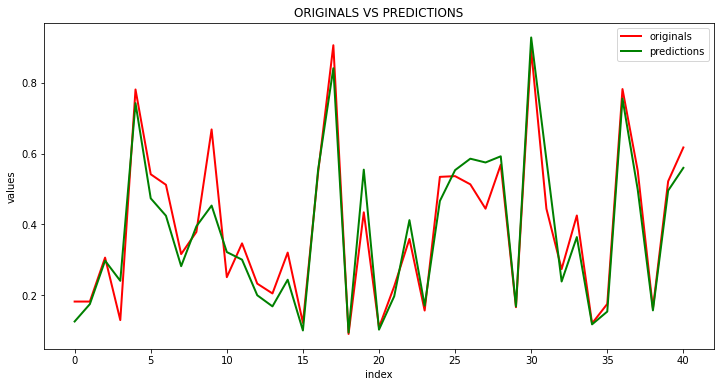

In [321]:
#random forest
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
model(rf,X_train,y_train,X_test,y_test)

KNeighborsRegressor(n_neighbors=4) 

r_2 score : 0.6509859020980427 

CV scores: [0.77863929 0.83324902 0.80396377 0.88613661 0.7543202 ] 

CV scores mean: 0.8112617765446203 

RMSE : 0.12963023699314624


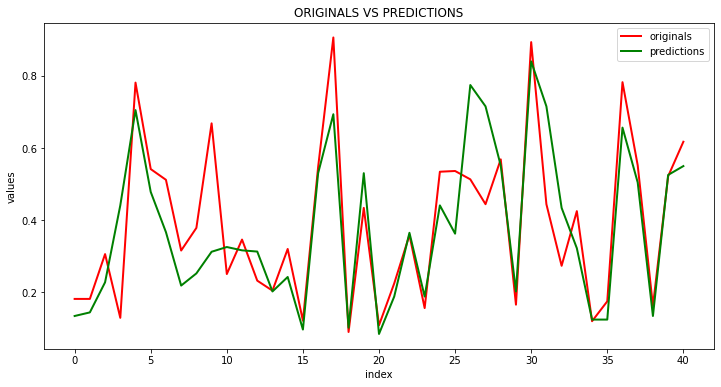

In [322]:
#knn
knn = KNeighborsRegressor(n_neighbors=4)
model(knn,X_train,y_train,X_test,y_test)

SVR(C=10, kernel='linear') 

r_2 score : 0.8455861385906265 

CV scores: [0.82509705 0.8630639  0.87764705 0.88908436 0.74011955] 

CV scores mean: 0.8390023816065467 

RMSE : 0.08622396138462916


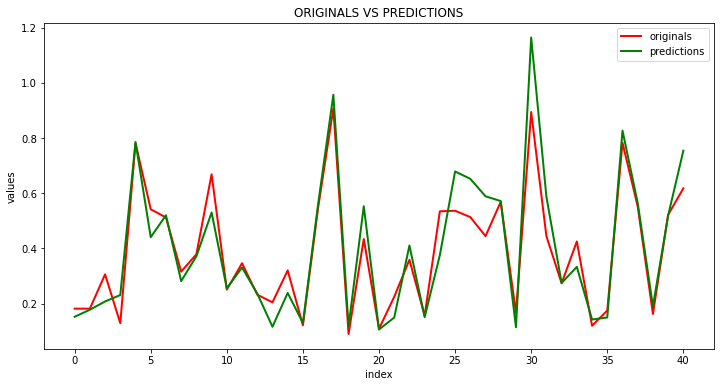

In [323]:
#Support vector machine
svr_reg = SVR(kernel='linear', C=10)
model(svr_reg,X_train,y_train,X_test,y_test)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=180, n_jobs=4, num_parallel_tree=1, random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None) 

r_2 score : 0.8941863908570279 

CV scores: [0.88444807 0.87734751 0.82735952 0.84692922 0.84052333] 

CV scores mean: 0.8553215280529592 

RMSE : 0.07137655681975856


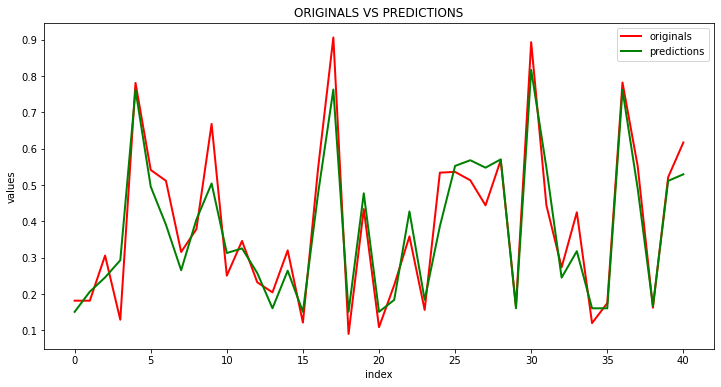

In [324]:
#Xgboost
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',gamma= 0.1, learning_rate= 0.05, max_depth= 3, n_estimators= 180,
                          seed=123)
model(xg_reg,X_train,y_train,X_test,y_test)
#yukarıdaki grid searchden bulduğum parametreleri deneyelim.
#gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 180}

In [325]:
#Ölçeklenmiş veri üzerinden gelen model sonuçlarının hepsini karşılaştıralım.
Model = ["LinearRegression","Lasso","Ridge","DecisionTreeRegressor","RandomForestRegressor","KNN","Support Vector Machine","Xgboost"]
results=pd.DataFrame({'Model': Model,'R Squared': r_2,'CV score mean': CV,'RMSE':rmse_hata})
#results=pd.DataFrame({'R Squared': r_2,'CV score mean': CV})
results

,Model,R Squared,CV score mean,RMSE
0,LinearRegression,0.86712,0.85713,0.07999
1,Lasso,0.83377,0.85502,0.08946
2,Ridge,0.86283,0.86582,0.08127
3,DecisionTreeRegressor,0.75874,0.82107,0.10778
4,RandomForestRegressor,0.91020,0.90043,0.06576
5,KNN,0.65099,0.81126,0.12963
6,Support Vector Machine,0.84559,0.83900,0.08622
7,Xgboost,0.89419,0.85532,0.07138


Ölçekli ve ölçekli olmayan veride baktığımızda, ölçeklenmemiş veride decision tree ve knn yüksek geri kalan tüm modeller ölçeklenmiş veride performansı daha yüksektir.